## VIEWS
- source data from the 2023-24 views competition

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/kaylahuang/Desktop/GitHub/conflicts/components/")

from views_cleaner import VIEWSCleaner

In [18]:
filename = '../data/views23/features/cm/cm_features.parquet'

features = pd.read_parquet(filename, engine='pyarrow')

## basic eda
features.shape # (77372, 126)
print(list(features.columns))
""" ['month_id', 'country_id', 'gleditsch_ward', 'ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 
'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'wdi_sp_pop_totl', 'ged_sb_tlag_1', 
'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6', 
'ged_os_tlag_1', 'wdi_ag_lnd_frst_k2', 'wdi_dt_oda_odat_pc_zs', 'wdi_ms_mil_xpnd_gd_zs', 
'wdi_ms_mil_xpnd_zs', 'wdi_nv_agr_totl_kd', 'wdi_nv_agr_totl_kn', 'wdi_ny_gdp_pcap_kd', 
'wdi_sp_dyn_le00_in', 'wdi_se_enr_prim_fm_zs', 'wdi_se_enr_prsc_fm_zs', 'wdi_se_prm_nenr', 
'wdi_sh_sta_maln_zs', 'wdi_sh_sta_stnt_zs', 'wdi_sl_tlf_totl_fe_zs', 'wdi_sm_pop_refg_or', 
'wdi_sm_pop_netm', 'wdi_sm_pop_totl_zs', 'wdi_sp_dyn_imrt_in', 'wdi_sh_dyn_mort_fe', 
'wdi_sp_pop_0014_fe_zs', 'wdi_sp_pop_1564_fe_zs', 'wdi_sp_pop_65up_fe_zs', 'wdi_sp_pop_grow', 
'wdi_sp_urb_totl_in_zs', 'splag_wdi_sl_tlf_totl_fe_zs', 'splag_wdi_sm_pop_refg_or', 
'splag_wdi_sm_pop_netm', 'splag_wdi_ag_lnd_frst_k2', 'vdem_v2x_delibdem', 'vdem_v2x_egaldem', 
'vdem_v2x_libdem', 'vdem_v2x_libdem_48', 'vdem_v2x_partip', 'vdem_v2x_partipdem', 
'vdem_v2x_accountability', 'vdem_v2x_civlib', 'vdem_v2x_clphy', 'vdem_v2x_cspart', 
'vdem_v2x_divparctrl', 'vdem_v2x_edcomp_thick', 'vdem_v2x_egal', 'vdem_v2x_execorr', 
'vdem_v2x_frassoc_thick', 'vdem_v2x_gencs', 'vdem_v2x_gender', 'vdem_v2x_genpp', 
'vdem_v2x_horacc', 'vdem_v2x_neopat', 'vdem_v2x_pubcorr', 'vdem_v2x_rule', 'vdem_v2x_veracc', 
'vdem_v2x_ex_military', 'vdem_v2x_ex_party', 'vdem_v2x_freexp', 'vdem_v2xcl_acjst', 
'vdem_v2xcl_dmove', 'vdem_v2xcl_prpty', 'vdem_v2xcl_rol', 'vdem_v2xcl_slave', 'vdem_v2xdd_dd', 
'vdem_v2xdl_delib', 'vdem_v2xeg_eqdr', 'vdem_v2xeg_eqprotec', 'vdem_v2xel_frefair', 
'vdem_v2xel_regelec', 'vdem_v2xme_altinf', 'vdem_v2xnp_client', 'vdem_v2xnp_regcorr', 
'vdem_v2xpe_exlecon', 'vdem_v2xpe_exlpol', 'vdem_v2xpe_exlgeo', 'vdem_v2xpe_exlgender', 'vdem_v2xpe_exlsocgr', 'vdem_v2xps_party', 'vdem_v2xcs_ccsi', 'vdem_v2xnp_pres', 'vdem_v2xeg_eqaccess', 'vdem_v2x_diagacc', 'vdem_v2clrgunev', 'splag_vdem_v2x_libdem', 'splag_vdem_v2xcl_dmove', 'splag_vdem_v2x_accountability', 'splag_vdem_v2xpe_exlsocgr', 'splag_vdem_v2xcl_rol', 'decay_ged_sb_5', 'decay_ged_os_5', 'decay_ged_sb_100', 'decay_ged_sb_500', 'decay_ged_os_100', 'decay_ged_ns_5', 'decay_ged_ns_100', 'decay_acled_sb_5', 'decay_acled_os_5', 'decay_acled_ns_5', 'agr_withdrawal_pct_t48', 'dam_cap_pcap_t48', 'groundwater_export_t48', 'fresh_withdrawal_pct_t48', 'ind_efficiency_t48', 'irr_agr_efficiency_t48', 'services_efficiency_t48', 'general_efficiency_t48', 'water_stress_t48', 'renewable_internal_pcap_t48', 'renewable_pcap_t48', 'splag_1_decay_ged_sb_5', 'splag_1_decay_ged_os_5', 'splag_1_decay_ged_ns_5'] 
"""

['month_id', 'country_id', 'gleditsch_ward', 'ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'wdi_sp_pop_totl', 'ged_sb_tlag_1', 'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6', 'ged_os_tlag_1', 'wdi_ag_lnd_frst_k2', 'wdi_dt_oda_odat_pc_zs', 'wdi_ms_mil_xpnd_gd_zs', 'wdi_ms_mil_xpnd_zs', 'wdi_nv_agr_totl_kd', 'wdi_nv_agr_totl_kn', 'wdi_ny_gdp_pcap_kd', 'wdi_sp_dyn_le00_in', 'wdi_se_enr_prim_fm_zs', 'wdi_se_enr_prsc_fm_zs', 'wdi_se_prm_nenr', 'wdi_sh_sta_maln_zs', 'wdi_sh_sta_stnt_zs', 'wdi_sl_tlf_totl_fe_zs', 'wdi_sm_pop_refg_or', 'wdi_sm_pop_netm', 'wdi_sm_pop_totl_zs', 'wdi_sp_dyn_imrt_in', 'wdi_sh_dyn_mort_fe', 'wdi_sp_pop_0014_fe_zs', 'wdi_sp_pop_1564_fe_zs', 'wdi_sp_pop_65up_fe_zs', 'wdi_sp_pop_grow', 'wdi_sp_urb_totl_in_zs', 'splag_wdi_sl_tlf_totl_fe_zs', 'splag_wdi_sm_pop_refg_or', 'splag_wdi_sm_pop_netm', 'splag_wdi_ag_lnd_frst_k2', 'vdem_v2x_delibdem', 'vdem_v2x_egaldem', 'vdem_v2x_libdem', 'vdem_v2x

" ['month_id', 'country_id', 'gleditsch_ward', 'ged_sb', 'ged_ns', 'ged_os', 'acled_sb', \n'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'wdi_sp_pop_totl', 'ged_sb_tlag_1', \n'ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_6', \n'ged_os_tlag_1', 'wdi_ag_lnd_frst_k2', 'wdi_dt_oda_odat_pc_zs', 'wdi_ms_mil_xpnd_gd_zs', \n'wdi_ms_mil_xpnd_zs', 'wdi_nv_agr_totl_kd', 'wdi_nv_agr_totl_kn', 'wdi_ny_gdp_pcap_kd', \n'wdi_sp_dyn_le00_in', 'wdi_se_enr_prim_fm_zs', 'wdi_se_enr_prsc_fm_zs', 'wdi_se_prm_nenr', \n'wdi_sh_sta_maln_zs', 'wdi_sh_sta_stnt_zs', 'wdi_sl_tlf_totl_fe_zs', 'wdi_sm_pop_refg_or', \n'wdi_sm_pop_netm', 'wdi_sm_pop_totl_zs', 'wdi_sp_dyn_imrt_in', 'wdi_sh_dyn_mort_fe', \n'wdi_sp_pop_0014_fe_zs', 'wdi_sp_pop_1564_fe_zs', 'wdi_sp_pop_65up_fe_zs', 'wdi_sp_pop_grow', \n'wdi_sp_urb_totl_in_zs', 'splag_wdi_sl_tlf_totl_fe_zs', 'splag_wdi_sm_pop_refg_or', \n'splag_wdi_sm_pop_netm', 'splag_wdi_ag_lnd_frst_k2', 'vdem_v2x_delibdem', 'vdem_v2x_egaldem', \n'vde

In [19]:
len(features.country_id.unique()) # 213 countries
print(features.country_id.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  45  46  47  48  49  50  52  53  54  55  58  59
  60  62  64  66  67  69  70  73  74  76  77  78  79  80  81  82  85  87
  89  90  93  94  96  97  99 100 101 104 105 107 108 109 112 116 118 119
 120 121 127 128 129 130 132 133 135 136 138 139 140 142 143 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 164 165 166
 167 168 169 171 172 173 174 177 178 179 180 181 182 183 185 186 187 188
 189 191 192 196 197 198 199 205 206 208 213 214 218 220 222 223 234 235
 236 237 239 243 244 163 170 240 184 110 115 123 134 248  92 111 113 114
 137 250 122 252  86 247 253  63  65 117 125 126 254  83  84 103 227  98
 102  56  57 144 242 124 131 176 209 230 231 232 233 245 246]


In [23]:
mean_fatalities = features.groupby('country_id')['ged_sb'].mean().sort_values(ascending=False)
for country_id, mean_fatality in mean_fatalities.items():
    print("country: ", country_id)
    print("mean number of fatalities: ", mean_fatality)


country:  191
mean number of fatalities:  1514.560975609756
country:  57
mean number of fatalities:  1053.9086021505377
country:  220
mean number of fatalities:  828.8980582524272
country:  133
mean number of fatalities:  717.2330097087379
country:  117
mean number of fatalities:  459.31876606683807
country:  247
mean number of fatalities:  388.3333333333333
country:  60
mean number of fatalities:  253.74514563106797
country:  124
mean number of fatalities:  212.29616724738676
country:  59
mean number of fatalities:  159.3127413127413
country:  121
mean number of fatalities:  147.40776699029126
country:  83
mean number of fatalities:  129.43896103896103
country:  120
mean number of fatalities:  116.21601941747574
country:  223
mean number of fatalities:  100.17718446601941
country:  218
mean number of fatalities:  91.3616504854369
country:  136
mean number of fatalities:  90.1868932038835
country:  167
mean number of fatalities:  82.22330097087378
country:  245
mean number of fatalitie

In [25]:
# number of entries per country - always around 400, for 154 countries it is 412
# {country: len(features[features["country_id"] == country]) for country in features.country_id.unique()}
# pd.Series([len(features[features["country_id"] == country]) for country in features.country_id.unique()]).value_counts()


In [17]:
country_id = 1
cleaner = VIEWSCleaner(filename, country_id)
features = cleaner.features



1
mean number of fatalities:  0.0


<function matplotlib.pyplot.show(close=None, block=None)>

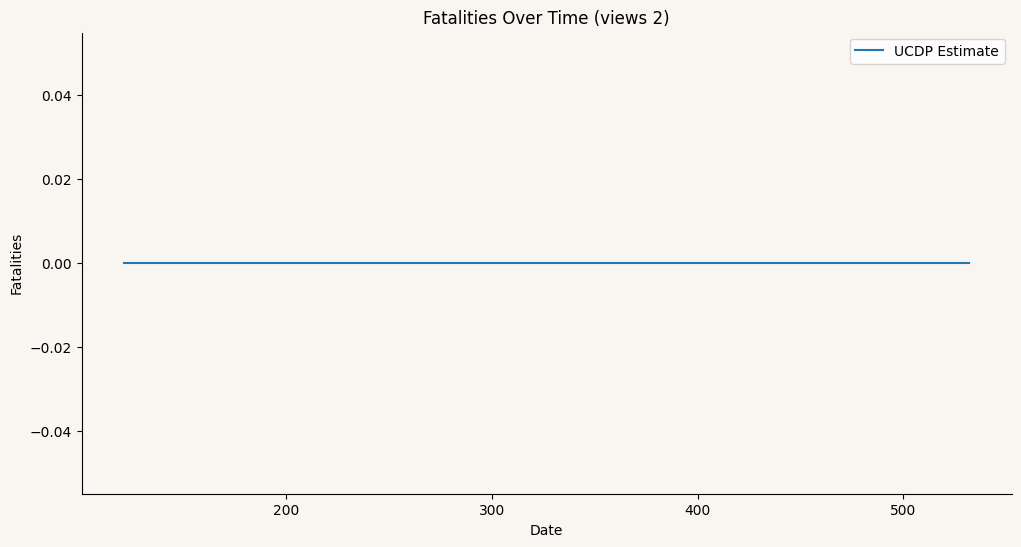

In [8]:
data = cleaner.features

dates = data["month_id"]
target = data["ged_sb"]

plt.figure(figsize=(12, 6))
plt.plot(dates, target, label='UCDP Estimate')  # Changed plot to scatterplot
plt.xlabel('Date')
plt.ylabel('Fatalities')
plt.gca().set_facecolor('#F9F5F1')
plt.gca().spines['top'].set_color('#F9F5F1')
plt.gca().spines['right'].set_color('#F9F5F1')
plt.gcf().set_facecolor('#F9F5F1')

plt.title(f'Fatalities Over Time (views {country_id})')
plt.legend()
plt.show